# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5
sample_size = pd.Series([10, 50, 500, 5000, 50000])
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))
tests = dists.apply(lambda d: stats.normaltest(d))

tests.head()

/home/helena/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (3.1288258926184085, 0.20921079509938273)
1    (5.1062579492921625, 0.07783773227814808)
2     (1.2703501049395514, 0.5298427299205469)
3     (5.331994913414348, 0.06952996580265387)
4     (1.9810200562172429, 0.3713872247857761)
dtype: object

#### Interpret the normaltest results and make your observations.

Hipótesis:
- H0 = es una distribución normal
- H1 = no es una distribución normal

El rdo. nos devuelve 2 valores:
- El primero cuanto más cercano a cero = distribución normal
- El segundo es el P-value:
  - P-value < 0.05 = se rechaza H0*
  - P-value > 0.05 = se confirma H0*
        
*Teniendo en cuenta que la significatividad (α) >= 0.05

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

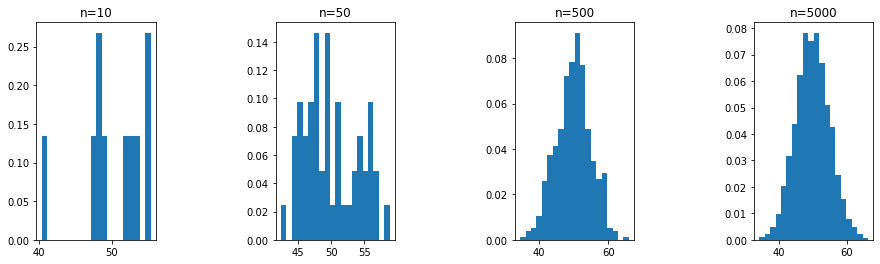

In [3]:
# Your code here
fig, ax = plt.subplots(1, 4)

fig.set_figwidth(15)
fig.subplots_adjust(wspace = 1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density = True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Como se puede apreciar, cuanto mayor es el tamaño de la muestra, la distribución tiende a una distribución normal.

El Teorema del Límite Central indica que cuando la suma de estas variables aleatorias e independientes es lo suficientemente grande, la función de distribución se aproxima a una distribución normal (también llamada distribución gaussiana, curva de Gauss o campana de Gauss).

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

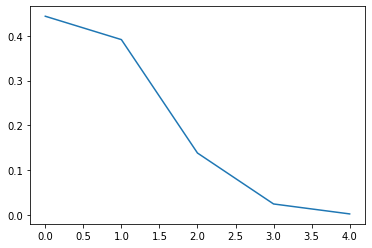

In [4]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15
x = range(n)
dist = binom(n, p)

fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

La Función de Probabilidad/Función de Masa de Probabilidad es una función que asocia a cada punto de su espacio muestral la probabilidad de que ésta lo asuma.

En este gráfico podemos ver que conociendo la probabilidad de hacer clic en un anuncio, la probabilidad de que entren X personas y hagan clic en el anuncio, es mucho menor conforme este valor aumenta. Es decir, es más probable que haga clic una persona al entrar a que lo hagan 4.

#### Now plot PMF with 50, 500, and 5000 visitors.

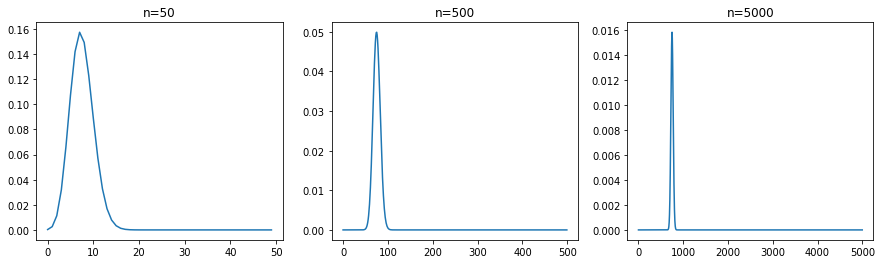

In [5]:
# Your code here
sample_size = [50, 500, 5000]
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)

for i in range(0, 3):
    n, p = sample_size[i], 0.15
    x = range(n)
    dist = binom(n,p)
    ax[i].set_title('n=%s' % (sample_size[i]))
    ax[i].plot(x,dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

Como se puede apreciar, cuanto mayor es el número de personas, la distribución tiende a una distribución normal, como el Teorema del Límite Central indica. Conforme aumenta el número de personas, la probabilidad de que todas ellas hagan clic al ver el anuncio, disminuye.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

La distribución de Poisson es una distribución de probabilidad discreta que se aplica a las ocurrencias de un suceso raro o con poca frecuencia, que ocurre de forma impredecible y de manera ocasional:
- Se desconoce el total de posibles resultados.
- Es útil cuando la muestra es grande y la probabilidad de éxito pequeña.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

0.011612348610402475

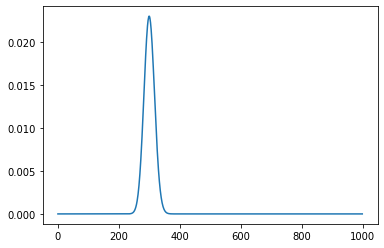

In [6]:
dist = stats.poisson(300)
x = range(1000)

plt.plot(x,dist.pmf(x));

dist.pmf(320)

#### What is the probability of getting 60 visits?

In [7]:
dist.pmf(60)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

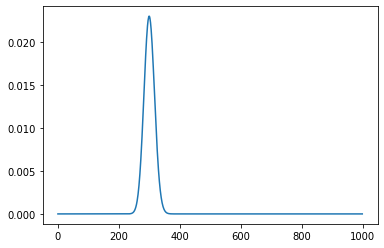

In [8]:
# your code here
dist = stats.poisson(300)
x = range(1000)

plt.plot(x, dist.pmf(x));